### Check how the yearly total runoff in the river forcing compares to that measured

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [7]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

In [6]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

In [6]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2003/ANHA12_EXH006_2003_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [60]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')

e1t_base = np.array(mesh.variables['e1t'])[0,imin:imax,jmin:jmax]
e2t_base = np.array(mesh.variables['e2t'])[0,imin:imax,jmin:jmax]
e3t = np.array(mesh.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]

In [63]:
sa = e1t_base*e2t_base

Load runoff forcing files; units are in kg/s/m2

In [7]:
rf = np.empty((18*12, imax-imin, jmax-jmin))

i=0
for year in range(2002, 2019):
    for month in range(0,12):
        c = nc.Dataset('/data/brogalla/runoff/ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y'+str(year)+'.nc','r')
        rf[i*12+month,:,:] = np.array(c.variables['runoff'])[month,imin:imax,jmin:jmax]
        
    i+=1

In [21]:
lon_riv = np.array(c.variables['nav_lon'])[imin:imax,jmin:jmax]
lat_riv = np.array(c.variables['nav_lat'])[imin:imax,jmin:jmax]
rf[rf == 0] = np.nan
lon_riv[rf[-1,:,:] == 0.0] = np.nan
lat_riv[rf[-1,:,:] == 0.0] = np.nan

Convert runoff in kg/s/m2 into km3/yr: 

In [65]:
total2011 = np.sum(rf[12*9:12*10,:,:]*3600*24*30, axis=0)*1e-12*sa[:,:]
total2012 = np.sum(rf[12*10:12*11,:,:]*3600*24*30, axis=0)*1e-12*sa[:,:]
total2013 = np.sum(rf[12*11:12*12,:,:]*3600*24*30, axis=0)*1e-12*sa[:,:]
total2014 = np.sum(rf[12*12:12*13,:,:]*3600*24*30, axis=0)*1e-12*sa[:,:]
total2015 = np.sum(rf[12*13:12*14,:,:]*3600*24*30, axis=0)*1e-12*sa[:,:]

##### Mecham

Measured in 2011, 0.009 km3/yr. Coordinate of river mouth: 75.067529, -108.751503

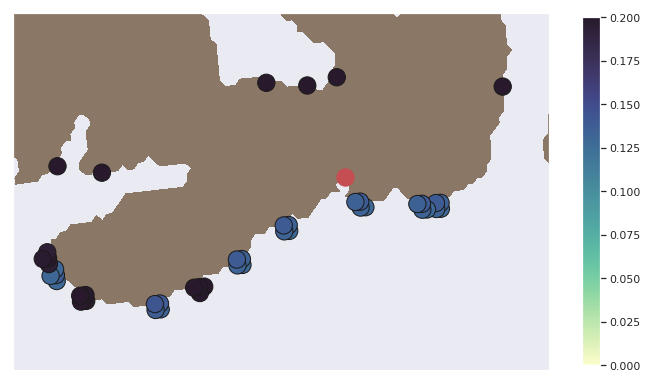

In [66]:
fig, ax1 = plt.subplots(figsize=(12,8))

proj2 = Basemap(projection='stere',lat_0 = 75, lon_0 = -110, resolution='i', width=0.3e6, height=0.2e6, ax=ax1)

x_land, y_land = proj2(lons, lats)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x_stn, y_stn = proj2(-108.751503, 75.067529)
proj2.scatter(x_stn, y_stn, s=300, c='r', zorder=3)

x_riv, y_riv = proj2(lon_riv, lat_riv)
CS = proj2.scatter(x_riv, y_riv, c=total2011, vmin=0, vmax=0.2,\
                   s=300, zorder=3, edgecolors='k', cmap=cmocean.cm.deep)
CBar = plt.colorbar(CS, shrink=0.8)

##### Ellice

Measured in 2012, 2 km3/yr. Coordinate location of river mouth: 68.049745, -103.992379

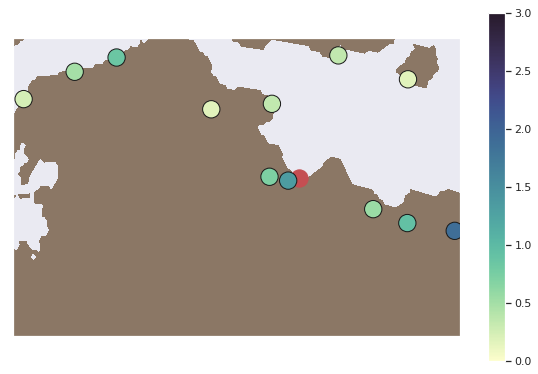

In [70]:
fig, ax1 = plt.subplots(figsize=(10,8))

proj2 = Basemap(projection='stere',lat_0 = 68, lon_0 = -105, resolution='i', width=0.3e6, height=0.2e6, ax=ax1)

x_land, y_land = proj2(lons, lats)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x_stn, y_stn = proj2(-103.992379, 68.049745)
proj2.scatter(x_stn, y_stn, s=300, c='r', zorder=3)

x_riv, y_riv = proj2(lon_riv, lat_riv)
CS = proj2.scatter(x_riv, y_riv, c=total2012, vmin=0, vmax=3,\
                   s=300, zorder=3, edgecolors='k', cmap=cmocean.cm.deep)
CBar = plt.colorbar(CS, shrink=0.8)

##### Tree river

Measured in 2014, 0.8 km3/yr. Mouth coordinates: 67.67N, 111.86W

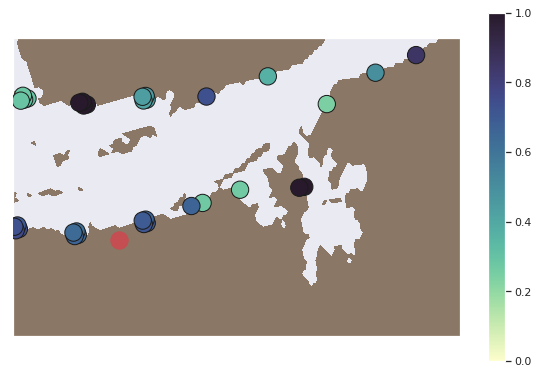

In [71]:
fig, ax1 = plt.subplots(figsize=(10,8))

proj2 = Basemap(projection='stere',lat_0 = 68, lon_0 = -110, resolution='i', width=0.3e6, height=0.2e6, ax=ax1)

x_land, y_land = proj2(lons, lats)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x_stn, y_stn = proj2(-111.86, 67.67)
proj2.scatter(x_stn, y_stn, s=300, c='r', zorder=3)

x_riv, y_riv = proj2(lon_riv, lat_riv)
CS = proj2.scatter(x_riv, y_riv, c=total2014, vmin=0, vmax=1,\
                   s=300, zorder=3, edgecolors='k', cmap=cmocean.cm.deep)
CBar = plt.colorbar(CS, shrink=0.8)

##### Marcil creek

Measured 0.017 km3/yr. Coordinates: 72.98891,-84.99816

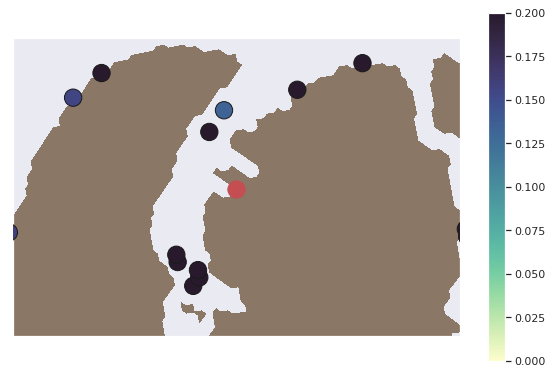

In [72]:
fig, ax1 = plt.subplots(figsize=(10,8))

proj2 = Basemap(projection='stere',lat_0 = 73, lon_0 = -85, resolution='i', width=0.3e6, height=0.2e6, ax=ax1)

x_land, y_land = proj2(lons, lats)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x_stn, y_stn = proj2(-84.99816, 72.98891)
proj2.scatter(x_stn, y_stn, s=300, c='r', zorder=3)

x_riv, y_riv = proj2(lon_riv, lat_riv)
CS = proj2.scatter(x_riv, y_riv, c=total2015, vmin=0, vmax=0.2,\
                   s=300, zorder=3, edgecolors='k', cmap=cmocean.cm.deep)
CBar = plt.colorbar(CS, shrink=0.8)